In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ stringr 1.4.0
✔ tidyr   1.1.4     ✔ forcats 0.5.1
✔ readr   2.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [72]:
Correlations <- read.csv("data/Correlations.csv")

In [73]:
Correlations

pt_id,cfDNA_sample,Correlation,Relapse,sampleID,sample_timepoint_days_since_OP
C04689,C303A04689D_cfdna_N295-103,0.56366807,No_relapse,C303A04689D,267
C04689,C305A04689D_cfdna_N295-71,0.59026831,No_relapse,C305A04689D,454
C04689,C309A04689D_cfdna_N295-47,0.56462465,No_relapse,C309A04689D,820
C04689,C302A04689D_cfdna_N295-102,0.58157370,No_relapse,C302A04689D,175
C04689,C299A04689D_cfdna_N295-99,0.31635764,No_relapse,C299A04689D,-1
C04689,C307A04689D_cfdna_N295-110,0.55753178,No_relapse,C307A04689D,637
C04689,C300A04689D_cfdna_N295-100,0.61363681,No_relapse,C300A04689D,37
C04689,C306A04689D_cfdna_N295-90,0.57317689,No_relapse,C306A04689D,539
C04689,C312A04689D_cfdna_N295-162,0.47006642,No_relapse,C312A04689D,1085
C04689,C311A04689D_cfdna_N295-157,0.55143078,No_relapse,C311A04689D,994


In [103]:
options(repr.plot.width=20, repr.plot.height=10)

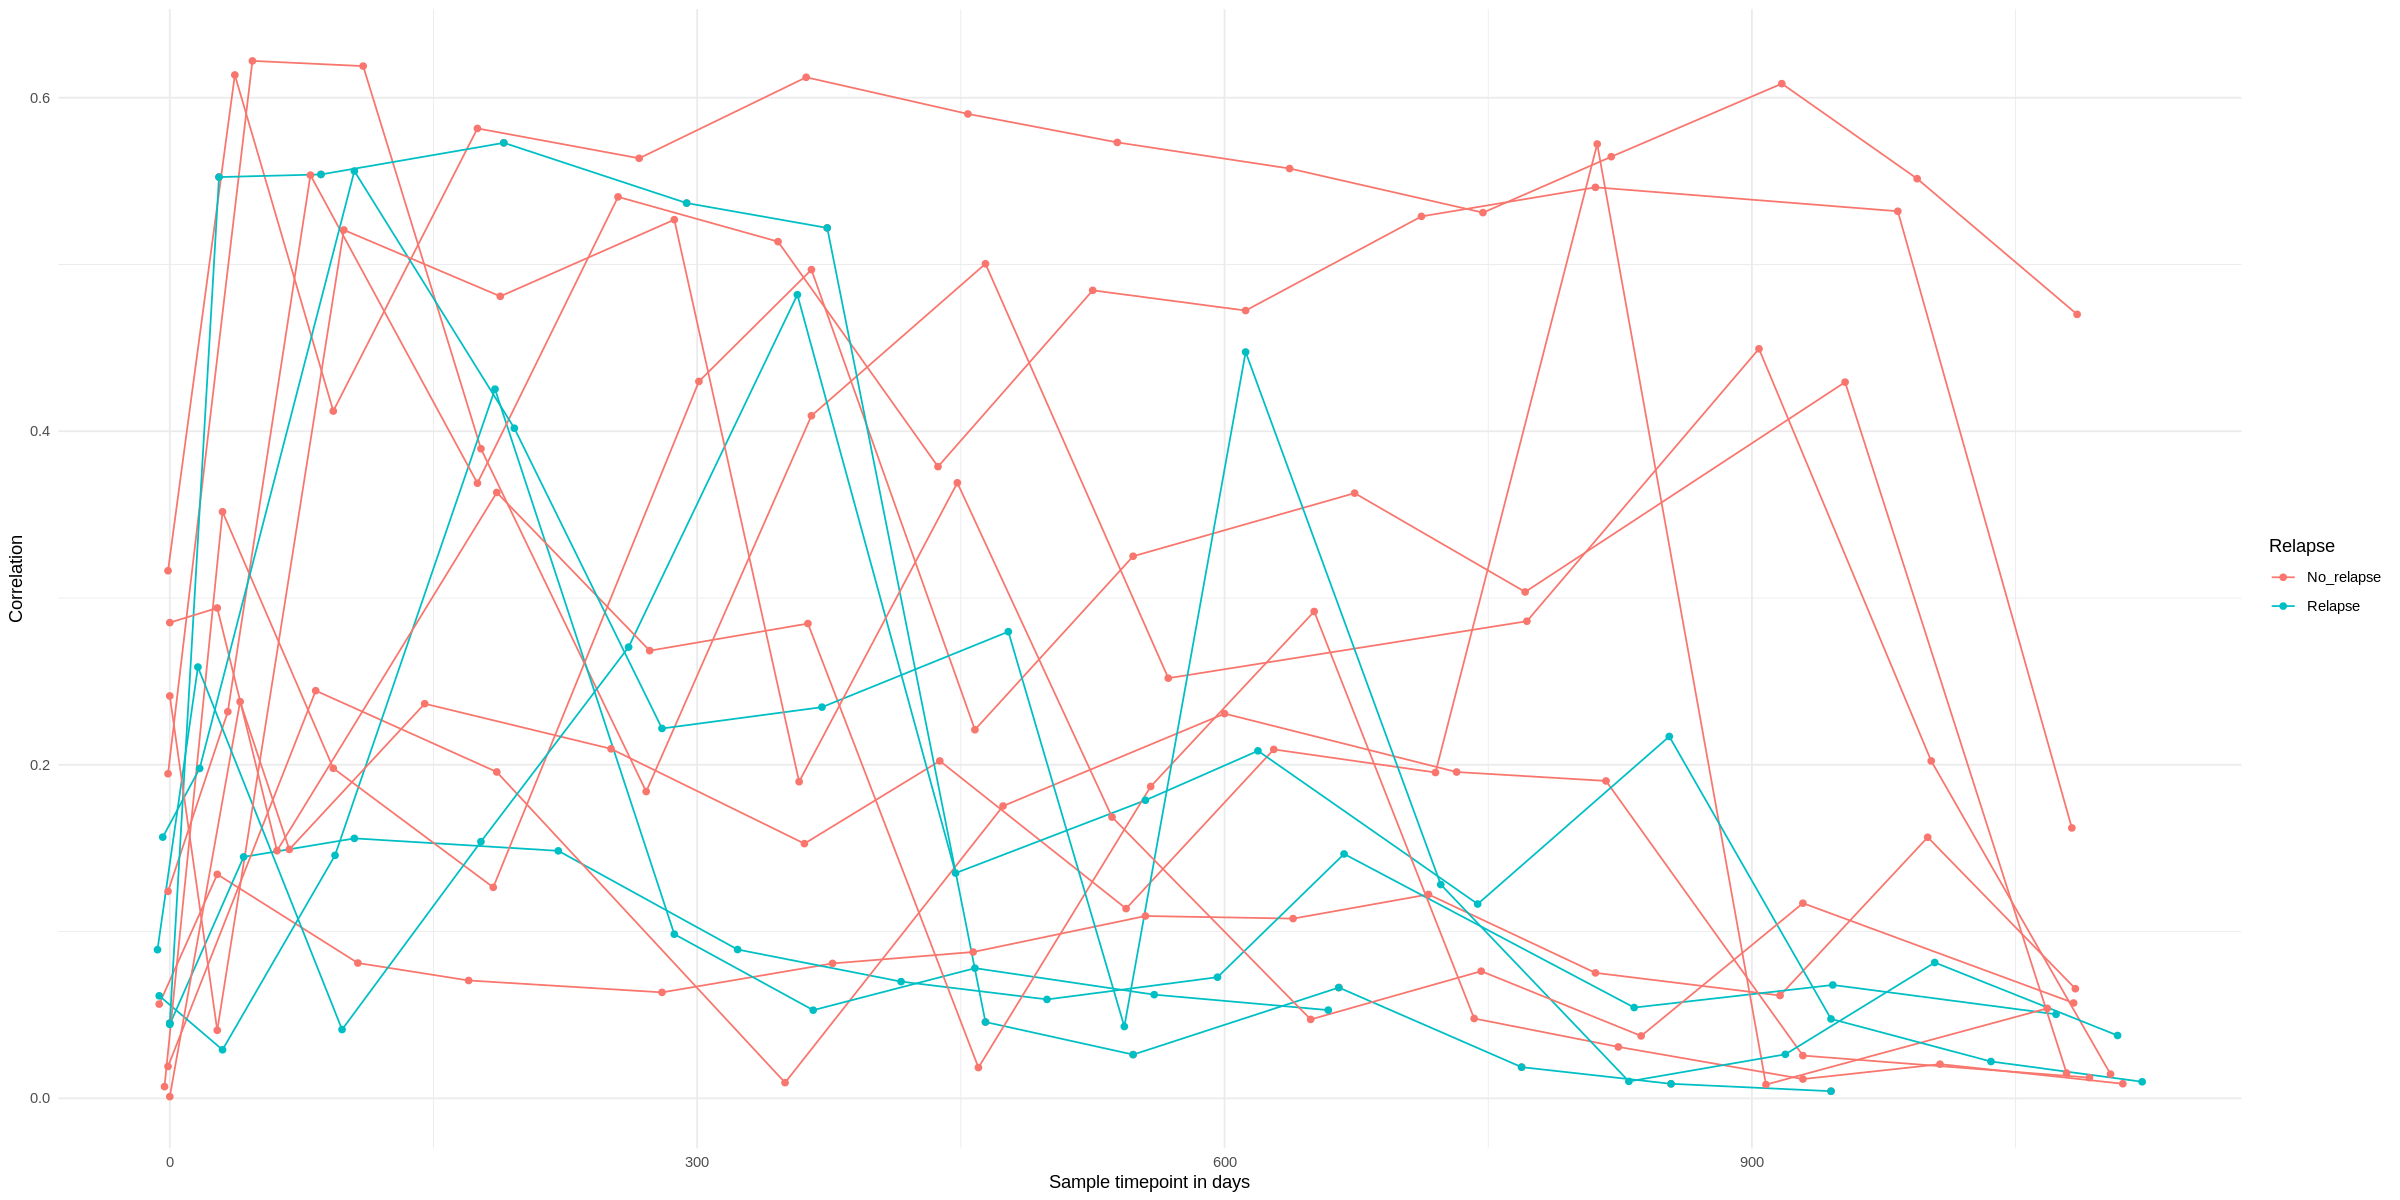

In [109]:
ggplot(data = Correlations)+
    geom_line(aes(x = sample_timepoint_days_since_OP, y = Correlation, group = pt_id, color = Relapse))+
    #geom_line(aes(x = sample_timepoint_days_since_OP, y = Correlation, color = pt_id))+
    geom_point(aes(x = sample_timepoint_days_since_OP, y = Correlation, color = Relapse))+
    theme_minimal()+
    xlab("Sample timepoint in days")
    